I want to reduce dimensions from my dataset to improve clustering. Here I try dimension reduction with PCA.
Also see the following link to make a scree plot with PCA.
This link is useful: https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

"Finally, explicitly cast the DataFrame into a numpy array which can be used  by the scikit-learn API. Note that at this point you lose your feature labels (Headers), so it would be difficult to keep track of the features if you use the "feature-importance" routine in scikit-learn. I have the practice of saving the headers before casting the data-frame into a numpy array. [>>list(<DataFrame>) prints out the headers into a nice list]"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn.preprocessing import scale

Read in a well of unnormalized data as a numpy array

In [3]:
# Read data directly in as a numpy array. Not in use, it can't handle headers or columns of different type
#my_data = np.genfromtxt(
#    '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/LABELLED_by_cell_type_screen_525_cell_plate_1_well_i12.csv',
#    delimiter=','); # This might not work because of the metadata, 
## maybe import as pandas df then subset to a numpy array, then label with the metadata

In [4]:
#type(my_data)

numpy.ndarray

In [7]:
# Make sure that they data is read in properly!!!!!!!!, check types and classes of columns, etc
#my_data[[0,1,-2,-1]]

array([[             nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan],
       [  0.00000000e+00,   5.20148000e+05,   7.66000000e+03,
          5.49105000e+05,   7.81400000e+03,   1.94881900e+06,
          1.44850000e+04,  -5.47752000e+05,   3.43100000e+03,
         -5.16340000e+04,

Read data in as a Pandas dataframe

In [2]:
filename = '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/LABELLED_by_cell_type_screen_525_cell_plate_1_well_g20.csv'

In [3]:
my_data=pd.read_csv(filename, index_col=0)

In [4]:
my_data.head()

,7AAD A,7AAD H,BL3-A,BL3-H,BL5-A,BL5-H,CD14 A : PE A,CD14 H : PE H,CD16 A : APC A,CD16 H : APC H,...,VL5-A,VL5-H,VL6-A,VL6-H,Width,cell_label,cell_plate,lineage,screen,well
0,471067.0,5232.0,502439.0,5535.0,2010041.0,12563.0,-313918.0,4408.0,47771.0,4258.0,...,152066.0,6861.0,839590.0,11465.0,5325.0,unlabelled,cell_plate_1,parent,screen_525,well_g20
1,-1075.0,946.0,3942.0,2158.0,2173.0,3288.0,-521.0,567.0,6477.0,4552.0,...,2331.0,2565.0,-7636.0,1323.0,35.0,unlabelled,cell_plate_1,parent,screen_525,well_g20
2,3883.0,3650.0,-1621.0,665.0,1050.0,3003.0,-420.0,673.0,2003.0,1581.0,...,1170.0,1814.0,258.0,3801.0,41.0,unlabelled,cell_plate_1,parent,screen_525,well_g20
3,191.0,1034.0,122.0,1503.0,-1085.0,754.0,5.0,585.0,508.0,1927.0,...,-2099.0,1673.0,5026.0,3870.0,45.0,unlabelled,cell_plate_1,parent,screen_525,well_g20
4,10903.0,10709.0,36598.0,10764.0,14528.0,7142.0,8148.0,4313.0,9301.0,3565.0,...,40222.0,30541.0,-2802.0,5491.0,167.0,unlabelled,cell_plate_1,parent,screen_525,well_g20


In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4678 entries, 0 to 4677
Data columns (total 37 columns):
7AAD A                               4678 non-null float64
7AAD H                               4678 non-null float64
BL3-A                                4678 non-null float64
BL3-H                                4678 non-null float64
BL5-A                                4678 non-null float64
BL5-H                                4678 non-null float64
CD14 A : PE A                        4678 non-null float64
CD14 H : PE H                        4678 non-null float64
CD16 A : APC A                       4678 non-null float64
CD16 H : APC H                       4678 non-null float64
CD34 A : BV605 A                     4678 non-null float64
CD34 H : BV605 H                     4678 non-null float64
CD66B A : CD19 A : CD3 A : FITC A    4678 non-null float64
CD66B H : CD19 H : CD3 H : FITC H    4678 non-null float64
FSC-A                                4678 non-null float64
FSC-H   

In [6]:
my_data_headers = list(my_data)

In [7]:
meta_headers = ["Width","cell_label","cell_plate","lineage","screen","well","Time"]

In [8]:
my_data_data_headers = [x for x in my_data_headers if not x in meta_headers]

In [9]:
my_data_data_headers

['7AAD A',
 '7AAD H',
 'BL3-A',
 'BL3-H',
 'BL5-A',
 'BL5-H',
 'CD14 A : PE A',
 'CD14 H : PE H',
 'CD16 A : APC A',
 'CD16 H : APC H',
 'CD34 A : BV605 A',
 'CD34 H : BV605 H',
 'CD66B A : CD19 A : CD3 A : FITC A',
 'CD66B H : CD19 H : CD3 H : FITC H',
 'FSC-A',
 'FSC-H',
 'KIT A : BV421 A',
 'KIT H : BV421 H',
 'RL2-A',
 'RL2-H',
 'SSC-A',
 'SSC-H',
 'VL2-A',
 'VL2-H',
 'VL3-A',
 'VL3-H',
 'VL5-A',
 'VL5-H',
 'VL6-A',
 'VL6-H']

In [10]:
%matplotlib notebook

In [11]:
my_data[my_data_data_headers].head(n=2)

,7AAD A,7AAD H,BL3-A,BL3-H,BL5-A,BL5-H,CD14 A : PE A,CD14 H : PE H,CD16 A : APC A,CD16 H : APC H,...,SSC-A,SSC-H,VL2-A,VL2-H,VL3-A,VL3-H,VL5-A,VL5-H,VL6-A,VL6-H
0,471067.0,5232.0,502439.0,5535.0,2010041.0,12563.0,-313918.0,4408.0,47771.0,4258.0,...,16777215.0,16765858.0,17889.0,18194.0,26351.0,7006.0,152066.0,6861.0,839590.0,11465.0
1,-1075.0,946.0,3942.0,2158.0,2173.0,3288.0,-521.0,567.0,6477.0,4552.0,...,442283.0,712901.0,-1194.0,626.0,334.0,980.0,2331.0,2565.0,-7636.0,1323.0


In [12]:
# scale the data.....note you can also use robust_scale, from sklearn.preprocessing import robust_scale
my_scaled_data = scale(my_data[my_data_data_headers])

In [13]:
my_scaled_data.dtype

dtype('float64')

In [14]:
my_scaled_data[[0,1,-2,-1]]

array([[  2.21679469e+00,  -2.25139142e-01,   9.51461276e-01,
         -2.84750597e-01,   3.99822699e+01,   2.75392097e+00,
         -6.22408302e-01,  -1.80038244e-01,   1.52711476e+00,
         -4.98041044e-01,  -8.37787680e-02,  -1.68045797e-01,
         -7.90801859e-02,  -2.63007461e-01,   1.42880275e+01,
          9.25485905e+00,   1.01626599e-01,   4.28847799e-01,
          4.47588561e+01,   6.21352345e+00,   1.07996988e+01,
          9.48530620e+00,  -9.06663857e-02,  -1.70212396e-01,
         -3.72913844e-02,  -1.86500103e-01,   2.65769441e-01,
         -2.03925211e-01,   1.83118609e+01,   2.96930737e+00],
       [ -1.23674096e-01,  -3.67757157e-01,  -9.72655205e-02,
         -3.85334108e-01,  -4.97498297e-02,   2.68075653e-01,
         -8.98126221e-02,  -2.86521700e-01,   9.26208665e-02,
         -4.46518436e-01,  -1.19937502e-01,  -3.00433908e-01,
         -1.12180026e-01,  -3.01809017e-01,  -1.76579046e-01,
         -3.18600821e-01,  -8.52166158e-02,  -2.24446384e-01,
       

In [15]:
# Perform PCA
pca = decomposition.PCA()
pca.fit(my_scaled_data)

PCA(copy=True, n_components=None, whiten=False)

In [16]:
#The amount of variance that each PC explains
var=pca.explained_variance_ratio_

<IPython.core.display.Javascript object>


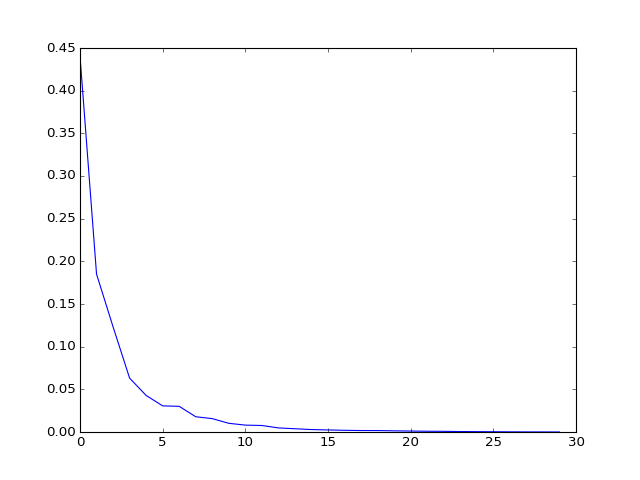

In [18]:
plt.plot(var)

In [19]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [1]:
print(var1)

NameError: name 'var1' is not defined

<IPython.core.display.Javascript object>


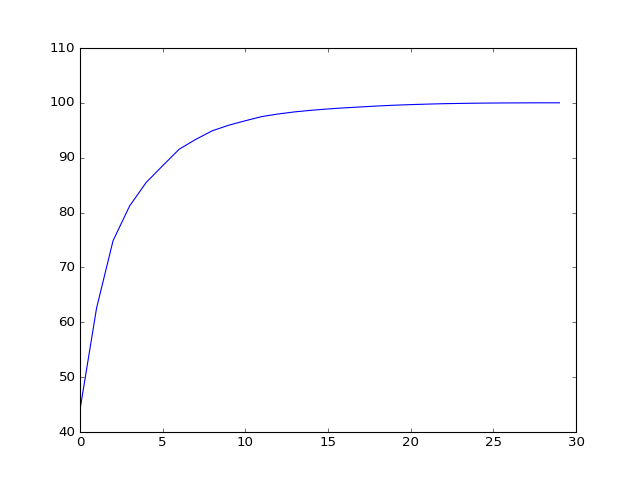

In [21]:
plt.plot(var1)

In [22]:
print("Based on the above for /Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/LABELLED_by_cell_type_screen_525_cell_plate_1_well_g20.csv I will use the first 5 components...this could and showld be done programmatically...say the number of components that explains 90% of the variance")

Based on the above for /Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/LABELLED_by_cell_type_screen_525_cell_plate_1_well_g20.csv I will use the first 5 components...this could and showld be done programmatically...say the number of components that explains 90% of the variance


In [23]:
print("Scaling seems to be very important")

Scaling seems to be very important


### Transform my data based on the PCA results 

In [99]:
pca = decomposition.PCA(n_components = 10)

In [100]:
pca.fit(my_scaled_data)

PCA(copy=True, n_components=10, whiten=False)

In [101]:
my_scaled_data_transformed = pca.fit_transform(my_scaled_data)

In [102]:
type(my_scaled_data_transformed)

numpy.ndarray

In [103]:
my_scaled_data_transformed.shape

(4678, 10)

In [104]:
my_scaled_data_transformed[[0,1,-2,-1]]

array([[ -1.96189421e+01,  -4.20367926e+00,  -5.12143121e+01,
          4.43952103e-02,  -2.94960044e+01,   2.92572237e+00,
         -8.73735776e+00,  -1.38463256e+01,   1.38954555e+01,
          1.77058807e+00],
       [  1.02643470e+00,   5.45255121e-01,  -1.16700421e-01,
          6.07223811e-02,  -2.28351687e-03,   2.65510083e-01,
         -5.64713362e-03,  -7.86302381e-02,  -1.60783224e-01,
          1.45748949e-01],
       [  1.11068743e+00,   5.32716267e-01,  -2.61693917e-02,
         -6.66904166e-01,  -2.15059475e-01,   6.58857492e-01,
          8.84920870e-02,  -2.10181272e-01,  -5.10794506e-01,
         -1.62161847e-01],
       [  1.18552563e+00,   7.26690446e-01,   3.05195423e-01,
         -4.42808592e-01,  -5.21539202e-01,   3.77175508e-01,
         -9.42083948e-02,  -9.58139065e-02,  -2.70340749e-01,
          8.49565080e-02]])

In [105]:
my_data[my_data_data_headers].shape

(4678, 30)

#### Convert transformed data into a pandas dataframe and then combine it with the meta data 

In [106]:
# Check that the row order isn't affected
pd.DataFrame(my_scaled_data_transformed[[0,1,-2,-1]])

,0,1,2,3,4,5,6,7,8,9
0,-19.618942,-4.203679,-51.214312,0.044395,-29.496004,2.925722,-8.737358,-13.846326,13.895456,1.770588
1,1.026435,0.545255,-0.116700,0.060722,-0.002284,0.265510,-0.005647,-0.078630,-0.160783,0.145749
2,1.110687,0.532716,-0.026169,-0.666904,-0.215059,0.658857,0.088492,-0.210181,-0.510795,-0.162162
3,1.185526,0.726690,0.305195,-0.442809,-0.521539,0.377176,-0.094208,-0.095814,-0.270341,0.084957


In [107]:
my_scaled_data_transformed_pd = pd.DataFrame(my_scaled_data_transformed)

In [108]:
my_scaled_data_transformed_pd.shape

(4678, 10)

In [109]:
my_scaled_data_transformed_pd_meta = pd.concat([my_scaled_data_transformed_pd, my_data[meta_headers]], axis=1);
# Note that the above line works because they have the same index, if they didn't and I 
## wanted to perform a cbind, I could say my_scaled_data_transformed_pd.reset_index(drop=True)

In [110]:
my_scaled_data_transformed_pd_meta.shape

(4678, 17)

In [111]:
print(my_data[meta_headers].head(n=2))
print("NEXT------------------------")
print(my_scaled_data_transformed_pd.head(n=2))
print("NEXT------------------------")
print(my_scaled_data_transformed_pd_meta.head(n=2))

    Width  cell_label    cell_plate lineage      screen      well      Time
0  5325.0  unlabelled  cell_plate_1  parent  screen_525  well_g20  257512.0
1    35.0  unlabelled  cell_plate_1  parent  screen_525  well_g20  257512.0
NEXT------------------------
           0         1          2         3          4         5         6  \
0 -19.618942 -4.203679 -51.214312  0.044395 -29.496004  2.925722 -8.737358   
1   1.026435  0.545255  -0.116700  0.060722  -0.002284  0.265510 -0.005647   

           7          8         9  
0 -13.846326  13.895456  1.770588  
1  -0.078630  -0.160783  0.145749  
NEXT------------------------
           0         1          2         3          4         5         6  \
0 -19.618942 -4.203679 -51.214312  0.044395 -29.496004  2.925722 -8.737358   
1   1.026435  0.545255  -0.116700  0.060722  -0.002284  0.265510 -0.005647   

           7          8         9   Width  cell_label    cell_plate lineage  \
0 -13.846326  13.895456  1.770588  5325.0  unlabelled  ce

In [112]:
filename_out = filename.split(".csv")[0] + "_PCAd.csv"

In [113]:
my_scaled_data_transformed_pd_meta.to_csv(filename_out)